In [1]:
#Import librairies
import pandas as pd 
import numpy as np
import tensorflow as tf 
import pathlib 
import os
import io

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import raw dataset from local files
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# First overview of the data
train_df.describe(include="all")

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


In [3]:
#types of columns of the dataframe
train_df.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [4]:
#Percentage of missing values
print("Percentage of missing values: ")
missing_values_p=(100*train_df.isnull().sum()/train_df.shape[0]).sort_values(ascending=False)
missing_values_p=missing_values_p.to_frame(name='percentage_of_NA')
missing_values_p.head(10)

Percentage of missing values: 


,percentage_of_NA
location,33.272035
keyword,0.801261
id,0.000000
text,0.000000
target,0.000000


In [5]:
#visualise locations
locations=train_df.location.dropna().tolist()
locations

['Birmingham',
 'Est. September 2012 - Bristol',
 'AFRICA',
 'Philadelphia, PA',
 'London, UK',
 'Pretoria',
 'World Wide!!',
 'Paranaque City',
 'Live On Webcam',
 'milky way',
 'GREENSBORO,NORTH CAROLINA',
 'Live On Webcam',
 'England.',
 'Sheffield Township, Ohio',
 'India',
 'Barbados',
 'Anaheim',
 'Abuja',
 'USA',
 'South Africa',
 'Sao Paulo, Brazil',
 'hollywoodland ',
 'Edmonton, Alberta - Treaty 6',
 'Inang Pamantasan',
 'Twitter Lockout in progress',
 'Concord, CA',
 'Calgary, AB',
 'Birmingham',
 'San Francisco',
 'CLVLND',
 'Nashville, TN',
 'Santa Clara, CA',
 'UK',
 'St. Louis, MO',
 'Walker County, Alabama',
 'Australia',
 'North Carolina',
 'Norf Carolina',
 'San Mateo County, CA',
 'North Carolina',
 'Njoro, Kenya',
 "Your Sister's Bedroom",
 'Arlington, TX',
 'South Bloomfield, OH',
 'New Hanover County, NC',
 'Maldives',
 'Manchester, NH',
 'Wilmington, NC',
 'New Hanover County, NC',
 'global',
 'Alberta | Sask. | Montana',
 'Charlotte',
 'Baton Rouge, LA',
 'Hager

In [6]:
#let see the proportion of 0 and 1 in the target
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

# PREPROCESSING

In [7]:
#convert location to str and replace missing values
train_df.location=[str(x) for x in train_df.location]
train_df.location.replace('nan', ' ', inplace=True)

test_df.location=[str(x) for x in test_df.location]
test_df.location.replace('nan', ' ', inplace=True)

# Remove all non alpha characters
train_df["location"] = train_df["location"].apply(lambda x:''.join(ch for ch in x if ch.isalpha() or ch==" "))
test_df["location"] = test_df["location"].apply(lambda x:''.join(ch for ch in x if ch.isalpha() or ch==" "))

In [8]:
#convert keyword to str and replace missing values
train_df.keyword=[str(x) for x in train_df.keyword]
train_df.keyword.replace('nan', ' ', inplace=True)

test_df.keyword=[str(x) for x in test_df.keyword]
test_df.keyword.replace('nan', ' ', inplace=True)

In [9]:
train_df.head(40)

,id,keyword,location,text,target
0,1,,,Our Deeds are the Reason of this #earthquake M...,1
1,4,,,Forest fire near La Ronge Sask. Canada,1
2,5,,,All residents asked to 'shelter in place' are ...,1
3,6,,,"13,000 people receive #wildfires evacuation or...",1
4,7,,,Just got sent this photo from Ruby #Alaska as ...,1
5,8,,,#RockyFire Update => California Hwy. 20 closed...,1
6,10,,,#flood #disaster Heavy rain causes flash flood...,1
7,13,,,I'm on top of the hill and I can see a fire in...,1
8,14,,,There's an emergency evacuation happening now ...,1
9,15,,,I'm afraid that the tornado is coming to our a...,1


In [10]:
#concatenate text, keyword and location
train_df.text=[train_df.text[i]+' '+train_df.keyword[i]+' '+train_df.location[i] for i in range (len(train_df))]
test_df.text=[test_df.text[i]+' '+test_df.keyword[i]+' '+test_df.location[i] for i in range (len(test_df))]


In [11]:
#install spacy
!python -m spacy download en_core_web_sm -q

#Import Spacy and english initialisation
import en_core_web_sm
nlp = en_core_web_sm.load()

# Import Stop words 
from spacy.lang.en.stop_words import STOP_WORDS

2022-07-05 16:26:12.998958: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-07-05 16:26:12.999360: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
You should consider upgrading via the 'C:\Users\Lenovo\anaconda3\python.exe -m pip install --upgrade pip' command.


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [13]:
# Remove all non alpha characters
train_df["text_clean"] = train_df["text"].apply(lambda x:''.join(ch for ch in x if ch.isalpha() or ch==" "))
test_df["text_clean"] = test_df["text"].apply(lambda x:''.join(ch for ch in x if ch.isalpha() or ch==" "))

# To lower case, remove useless whitespaces 
train_df["text_clean"] = train_df["text_clean"].apply(lambda x: x.replace(" +"," ").lower().strip())
test_df["text_clean"] = test_df["text_clean"].apply(lambda x: x.replace(" +"," ").lower().strip())

In [14]:
# Lemmatize and remove stop words
train_df["text_clean"] = train_df["text_clean"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if (token.lemma_ not in STOP_WORDS) and (token.text not in STOP_WORDS)]))
test_df["text_clean"] = test_df["text_clean"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if (token.lemma_ not in STOP_WORDS) and (token.text not in STOP_WORDS)]))


In [15]:
#display train_df
train_df.head(10)

,id,keyword,location,text,target,text_clean
0,1,,,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake allah forgive
1,4,,,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,,,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...
3,6,,,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...
4,7,,,Just got sent this photo from Ruby #Alaska as ...,1,got send photo ruby alaska smoke wildfires pou...
5,8,,,#RockyFire Update => California Hwy. 20 closed...,1,rockyfire update california hwy close dire...
6,10,,,#flood #disaster Heavy rain causes flash flood...,1,flood disaster heavy rain cause flash flooding...
7,13,,,I'm on top of the hill and I can see a fire in...,1,m hill fire wood
8,14,,,There's an emergency evacuation happening now ...,1,s emergency evacuation happen building street
9,15,,,I'm afraid that the tornado is coming to our a...,1,m afraid tornado come area


In [16]:
#display train_df
train_df.head(10)

,id,keyword,location,text,target,text_clean
0,1,,,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake allah forgive
1,4,,,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,,,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...
3,6,,,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...
4,7,,,Just got sent this photo from Ruby #Alaska as ...,1,got send photo ruby alaska smoke wildfires pou...
5,8,,,#RockyFire Update => California Hwy. 20 closed...,1,rockyfire update california hwy close dire...
6,10,,,#flood #disaster Heavy rain causes flash flood...,1,flood disaster heavy rain cause flash flooding...
7,13,,,I'm on top of the hill and I can see a fire in...,1,m hill fire wood
8,14,,,There's an emergency evacuation happening now ...,1,s emergency evacuation happen building street
9,15,,,I'm afraid that the tornado is coming to our a...,1,m afraid tornado come area


In [17]:
import re

# remove words with 1 letter
shortword = re.compile(r'\W*\b\w{1}\b')


#remove all the words with 1 letter from the train and test dataframes
train_df.text_clean=[shortword.sub('', text) for text in train_df.text_clean ]
test_df.text_clean=[shortword.sub('', text) for text in test_df.text_clean ]

In [18]:
# get the most common words

#get the all the text of the train and test dataframe
train_text = ' '.join([text for text in train_df["text_clean"]])
test_text = ' '.join([text for text in test_df["text_clean"]])

#get a list of all the words in train and test
train_words=train_text.split(' ')
test_words=test_text.split(' ')

#create a dataframe to stock all the words
train_words_dict = {'words': train_words}
train_words_df=pd.DataFrame(train_words_dict)

test_words_dict = {'words': test_words}
test_words_df=pd.DataFrame(test_words_dict)



In [19]:
#Count occurence of words in train
train_words_df['occurence']=1
train_words_df=train_words_df.groupby('words').count().sort_values('occurence', ascending=False)
train_words_df.head(10)

,occurence
words,
,8771
new,439
like,393
fire,392
amp,300
usa,286
burn,240
bomb,234
crash,228


In [20]:
#Count occurence of words in test
test_words_df['occurence']=1
test_words_df.groupby('words').count().sort_values('occurence', ascending=False).head(10)

,occurence
words,
,3649
new,205
fire,174
like,165
amp,136
usa,122
attack,113
burn,104
crash,99


# Data encoding

In [21]:
# check if there is empty text
train_df[train_df["text_clean"] == ""].head()

,id,keyword,location,text,target,text_clean


In [22]:
# Use keras tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=1000)
tokenizer.fit_on_texts(train_df["text_clean"])

# Create tokenized tweets
train_df["encoded_text"] = tokenizer.texts_to_sequences(train_df.text_clean)
test_df["encoded_text"] = tokenizer.texts_to_sequences(test_df.text_clean)

# Add new column with length of token list
train_df["encoded_text_length"] = train_df["encoded_text"].apply(lambda x: len(x))
test_df["encoded_text_length"] = test_df["encoded_text"].apply(lambda x: len(x))



In [23]:
# Empty encoded text in train dataframe
print('the number of line is {}'.format(len(train_df[train_df["encoded_text_length"] == 0])))
train_df[train_df["encoded_text_length"] == 0]

the number of line is 5


,id,keyword,location,text,target,text_clean,encoded_text,encoded_text_length
19,28,,,What a goooooooaaaaaal!!!!!!,0,goooooooaaaaaal,[],0
20,31,,,this is ridiculous....,0,ridiculous,[],0
24,36,,,LOOOOOOL,0,looooool,[],0
28,40,,,Cooool :),0,cooool,[],0
3439,4915,exploded,LFC x GSW,@KopiteLuke1892 Its broken its fully exploded....,1,kopiteluke broken fully exploded exploded lfc gsw,[],0


In [24]:
# Empty encoded text in train dataframe
print('the number of line is {}'.format(len(test_df[test_df["encoded_text_length"] == 0])))
test_df[test_df["encoded_text_length"] == 0]


the number of line is 3


,id,keyword,location,text,text_clean,encoded_text,encoded_text_length
11,35,,,NOOOOOOOOO! Don't do that!,nooooooooo,[],0
13,43,,,What if?!,,[],0
2014,6778,lightning,Rotterdam The Netherlands,@LtDalius after democracy lightning Rotterdam ...,ltdalius democracy lightne rotterdam netherland,[],0


In [25]:
# delete empty encoded text lines from the dataframe
train_df = train_df[train_df["encoded_text_length"] != 0]

#reset index
train_df.reset_index(drop=True, inplace=True)

#we will not delete empty encoded text lines from the test dataframe because we need to predict every line

In [26]:
#we must have the same padding length for the train and test so we will take tha maximum length between them 
padding_len = max(train_df["encoded_text_length"].max(), test_df["encoded_text_length"].max())

# Adding zeropadding (tokens) at the end of sequences (padding="post") 
train_tweets_pad = tf.keras.preprocessing.sequence.pad_sequences(train_df.encoded_text, padding="post", maxlen=padding_len)
pred_tweets_pad = tf.keras.preprocessing.sequence.pad_sequences(test_df.encoded_text, padding="post", maxlen=padding_len)

# SPLITTING THE DATASET

In [27]:
# Train Test Split
n_samples = train_df.shape[0]
TAKE_SIZE = int(0.7 * n_samples)

#slice train_df
full_ds = tf.data.Dataset.from_tensor_slices((train_tweets_pad, train_df.target.values)).shuffle(n_samples, reshuffle_each_iteration=False)

# .shuffle() allows to randomly split the train and the test sets
# reshuffle_each_iteration=False is very important in order to avoid
# changing the splitting of the dataset between train and test
train_data = full_ds.take(TAKE_SIZE)
train_data = train_data.shuffle(TAKE_SIZE).batch(128)

test_data = full_ds.skip(TAKE_SIZE)
test_data = test_data.shuffle(n_samples - TAKE_SIZE).batch(128)

In [28]:
# single batch of data
for text, target in train_data.take(1):
  print(text, target)

tf.Tensor(
[[ 63  47  91 ...   0   0   0]
 [ 24 352 295 ...   0   0   0]
 [137 835  83 ...   0   0   0]
 ...
 [539 572 376 ...   0   0   0]
 [208   5   0 ...   0   0   0]
 [468 338  85 ...   0   0   0]], shape=(128, 18), dtype=int32) tf.Tensor(
[0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0
 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1
 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0
 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1], shape=(128,), dtype=int64)


# MODELS SIMULATION

In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense,LSTM,SimpleRNN, GRU, Dropout
from tensorflow.keras.optimizers.schedules import ExponentialDecay



# -LSTM MODEL:

In [30]:
# number of words in our disctionnary
vocab_size = tokenizer.num_words 

# length of a padded sequence
squence_max_len = train_tweets_pad.shape[1] 

# use a 128 values vector to represent a word
embedding_dim=128 

# Learning rate schedule aiming to decrease said rate while model trains. 
initial_learning_rate = 0.0001

lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True)


    


# Create sequential model
LSTM_model = Sequential([

  # word embedding input layer (input dim need to be equal to the size of the vocabulary + 1 because of the zero padding)
  Embedding(input_dim=vocab_size+1, output_dim=embedding_dim, input_shape=(squence_max_len,), name="embedding"), 
  
  # LSTM layer
  LSTM(units=256, return_sequences=True),
  
  #LSTM layer
  LSTM(units=128, return_sequences=False),

  # Dense layer
  Dense(64, activation='relu'),

  # Dense layer
  Dense(32, activation='relu'),

  # Dense layer
  Dense(16, activation='relu'),

  # Dense layer
  Dense(8, activation='relu'),

  # Dropout(rate = %60) to reduce the overfitting
  Dropout(0.6),

  #output layer with as many neurons as the number of classes (here two : 0 and 1 ==> sigmoid activation function)
  Dense(1, activation="sigmoid",name="output_layer") 
])

LSTM_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 18, 128)           128128    
                                                                 
 lstm (LSTM)                 (None, 18, 256)           394240    
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 1

In [31]:
# Compile model
LSTM_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate = lr_schedule),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
    )

In [32]:
# Save parameters for further use
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")

In [33]:

# Training over 30 epochs
LSTM_history=LSTM_model.fit(train_data,validation_data=test_data, epochs=30,callbacks=[tensorboard_callback])

Epoch 1/30
42/42 [==============================] - 11s 159ms/step - loss: 0.6864 - binary_accuracy: 0.5628 - val_loss: 0.6761 - val_binary_accuracy: 0.5738
Epoch 2/30
42/42 [==============================] - 6s 138ms/step - loss: 0.6720 - binary_accuracy: 0.5728 - val_loss: 0.6485 - val_binary_accuracy: 0.5764
Epoch 3/30
42/42 [==============================] - 6s 139ms/step - loss: 0.6189 - binary_accuracy: 0.6370 - val_loss: 0.5586 - val_binary_accuracy: 0.7617
Epoch 4/30
42/42 [==============================] - 6s 138ms/step - loss: 0.5535 - binary_accuracy: 0.7003 - val_loss: 0.5124 - val_binary_accuracy: 0.7696
Epoch 5/30
42/42 [==============================] - 6s 139ms/step - loss: 0.5328 - binary_accuracy: 0.7651 - val_loss: 0.5079 - val_binary_accuracy: 0.7766
Epoch 6/30
42/42 [==============================] - 6s 137ms/step - loss: 0.5152 - binary_accuracy: 0.7733 - val_loss: 0.5009 - val_binary_accuracy: 0.7744
Epoch 7/30
42/42 [==============================] - 6s 137ms/st

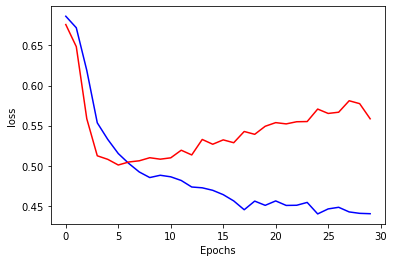

In [34]:
# Training process visualization regarding loss function 
plt.plot(LSTM_history.history["loss"], color="b")
plt.plot(LSTM_history.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

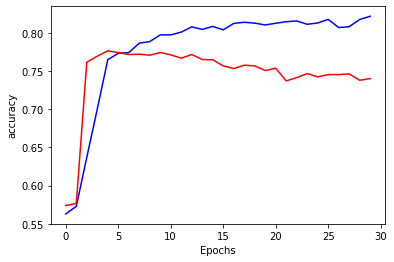

In [35]:
# Training process visualization regarding the accuracy
plt.plot(LSTM_history.history["binary_accuracy"], color="b")
plt.plot(LSTM_history.history["val_binary_accuracy"], color="r")
plt.ylabel("accuracy")
plt.xlabel("Epochs")
plt.show()

### => LSTM model reach a good val_binary_accuracy=0.7744 and binary_accuracy=0.7733 at epoch 6 but start to overfit after that

# -SIMPLERNN MODEL:

In [36]:
# number of words in our disctionnary
vocab_size = tokenizer.num_words 

# length of a padded sequence
squence_max_len = train_tweets_pad.shape[1] 

# use a 128 values vector to represent a word
embedding_dim=128 

# Learning rate schedule aiming to decrease said rate while model trains. 
initial_learning_rate = 0.0001

lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True)


    


# Create sequential model
SimpleRNN_model = Sequential([

  # word embedding input layer (input dim need to be equal to the size of the vocabulary + 1 because of the zero padding)
  Embedding(input_dim=vocab_size+1, output_dim=embedding_dim, input_shape=(squence_max_len,), name="embedding"), 
  
  #SimpleRNN layer
  SimpleRNN(units=256, return_sequences=True),
  
  #SimpleRNN layer
  SimpleRNN(units=128, return_sequences=False),

  # Dense layer
  Dense(64, activation='relu'),

  # Dense layer
  Dense(32, activation='relu'),

  # Dense layer
  Dense(16, activation='relu'),

  # Dense layer
  Dense(8, activation='relu'),

  # Dropout(rate = %60),
  Dropout(0.6),

  #output layer with as many neurons as the number of classes (here two : 0 and 1 ==> sigmoid activation function)
  Dense(1, activation="sigmoid",name="output_layer") 
])

SimpleRNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 18, 128)           128128    
                                                                 
 simple_rnn (SimpleRNN)      (None, 18, 256)           98560     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 128)               49280     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 8)                

In [37]:
# Compile model
SimpleRNN_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate = lr_schedule),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
    )

# Save parameters for further use
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")

# Training over 30 epochs
SimpleRNN_history=SimpleRNN_model.fit(train_data,validation_data=test_data, epochs=30,callbacks=[tensorboard_callback])

Epoch 1/30
42/42 [==============================] - 4s 57ms/step - loss: 0.6874 - binary_accuracy: 0.5362 - val_loss: 0.6759 - val_binary_accuracy: 0.5839
Epoch 2/30
42/42 [==============================] - 2s 37ms/step - loss: 0.6731 - binary_accuracy: 0.5713 - val_loss: 0.6617 - val_binary_accuracy: 0.6088
Epoch 3/30
42/42 [==============================] - 2s 39ms/step - loss: 0.6528 - binary_accuracy: 0.6188 - val_loss: 0.6171 - val_binary_accuracy: 0.6877
Epoch 4/30
42/42 [==============================] - 2s 38ms/step - loss: 0.6136 - binary_accuracy: 0.6719 - val_loss: 0.5655 - val_binary_accuracy: 0.7367
Epoch 5/30
42/42 [==============================] - 2s 38ms/step - loss: 0.5667 - binary_accuracy: 0.7371 - val_loss: 0.5419 - val_binary_accuracy: 0.7495
Epoch 6/30
42/42 [==============================] - 2s 39ms/step - loss: 0.5384 - binary_accuracy: 0.7555 - val_loss: 0.5237 - val_binary_accuracy: 0.7608
Epoch 7/30
42/42 [==============================] - 2s 37ms/step - los

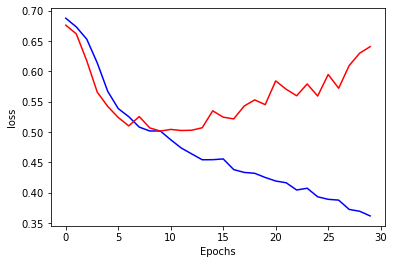

In [38]:
# Training process visualization regarding loss function 
plt.plot(SimpleRNN_history.history["loss"], color="b")
plt.plot(SimpleRNN_history.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

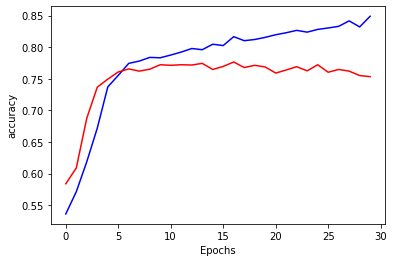

In [39]:
# Training process visualization regarding the accuracy
plt.plot(SimpleRNN_history.history["binary_accuracy"], color="b")
plt.plot(SimpleRNN_history.history["val_binary_accuracy"], color="r")
plt.ylabel("accuracy")
plt.xlabel("Epochs")
plt.show()

### => SimpleRNN model reach a good val_binary_accuracy=0.7608 and binary_accuracy=0.7555 at epoch 6 but start to overfit after that

# -GRU MODEL:

In [40]:
# number of words in our disctionnary
vocab_size = tokenizer.num_words 

# length of a padded sequence
squence_max_len = train_tweets_pad.shape[1] 

# use a 128 values vector to represent a word
embedding_dim=128 

# Learning rate schedule aiming to decrease said rate while model trains. 
initial_learning_rate = 0.0001

lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True)


    


# Create sequential model
GRU_model = Sequential([

  # word embedding input layer (input dim need to be equal to the size of the vocabulary + 1 because of the zero padding)
  Embedding(input_dim=vocab_size+1, output_dim=embedding_dim, input_shape=(squence_max_len,), name="embedding"), 
  
  # GRU layer
  GRU(units=256, return_sequences=True),
  
  # GRU layer
  GRU(units=128, return_sequences=False),

  # Dense layer
  Dense(64, activation='relu'),

  # Dense layer
  Dense(32, activation='relu'),

  # Dense layer
  Dense(16, activation='relu'),

  # Dense layer
  Dense(8, activation='relu'),

  # Dropout(rate = %60),
  Dropout(0.6),

  #output layer with as many neurons as the number of classes (here two : 0 and 1 ==> sigmoid activation function)
  Dense(1, activation="sigmoid",name="output_layer") 
])

GRU_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 18, 128)           128128    
                                                                 
 gru (GRU)                   (None, 18, 256)           296448    
                                                                 
 gru_1 (GRU)                 (None, 128)               148224    
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 8)                

In [41]:
# Compile model
GRU_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate = lr_schedule),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
    )

# Save parameters for further use
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")

# Training over 30 epochs
GRU_history=SimpleRNN_model.fit(train_data,validation_data=test_data, epochs=30,callbacks=[tensorboard_callback])

Epoch 1/30
42/42 [==============================] - 2s 36ms/step - loss: 0.3676 - binary_accuracy: 0.8421 - val_loss: 0.6542 - val_binary_accuracy: 0.7582
Epoch 2/30
42/42 [==============================] - 2s 37ms/step - loss: 0.3577 - binary_accuracy: 0.8423 - val_loss: 0.6523 - val_binary_accuracy: 0.7551
Epoch 3/30
42/42 [==============================] - 2s 38ms/step - loss: 0.3484 - binary_accuracy: 0.8545 - val_loss: 0.6623 - val_binary_accuracy: 0.7468
Epoch 4/30
42/42 [==============================] - 2s 38ms/step - loss: 0.3444 - binary_accuracy: 0.8496 - val_loss: 0.6741 - val_binary_accuracy: 0.7569
Epoch 5/30
42/42 [==============================] - 2s 39ms/step - loss: 0.3403 - binary_accuracy: 0.8475 - val_loss: 0.7366 - val_binary_accuracy: 0.7438
Epoch 6/30
42/42 [==============================] - 2s 37ms/step - loss: 0.3395 - binary_accuracy: 0.8554 - val_loss: 0.7170 - val_binary_accuracy: 0.7486
Epoch 7/30
42/42 [==============================] - 2s 37ms/step - los

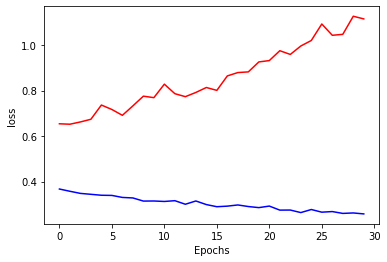

In [42]:
# Training process visualization regarding loss function 
plt.plot(GRU_history.history["loss"], color="b")
plt.plot(GRU_history.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

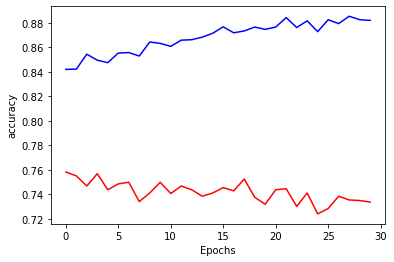

In [43]:
# Training process visualization regarding the accuracy
plt.plot(GRU_history.history["binary_accuracy"], color="b")
plt.plot(GRU_history.history["val_binary_accuracy"], color="r")
plt.ylabel("accuracy")
plt.xlabel("Epochs")
plt.show()

### => GRU model overfit

## => The LSTM model is better than SimpleRNN and GRU

# FIT THE BEST MODEL

Let's fit our LSTM model in 6 epoch to get the best performance

Initialise the model:

In [54]:
# number of words in our disctionnary
vocab_size = tokenizer.num_words 

# length of a padded sequence
squence_max_len = train_tweets_pad.shape[1] 

# use a 128 values vector to represent a word
embedding_dim=128 

# Learning rate schedule aiming to decrease said rate while model trains. 
initial_learning_rate = 0.0001

lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True)


# Create sequential model
LSTM_model_to_predict = Sequential([

  # word embedding input layer (input dim need to be equal to the size of the vocabulary + 1 because of the zero padding)
  Embedding(input_dim=vocab_size+1, output_dim=embedding_dim, input_shape=(squence_max_len,), name="embedding"), 
  
  # LSTM layer
  LSTM(units=256, return_sequences=True),
  
  #LSTM layer
  LSTM(units=128, return_sequences=False),

  # Dense layer
  Dense(64, activation='relu'),

  # Dense layer
  Dense(32, activation='relu'),

  # Dense layer
  Dense(16, activation='relu'),

  # Dense layer
  Dense(8, activation='relu'),

  # Dropout(rate = %60) to reduce the overfitting
  Dropout(0.6),

  #output layer with as many neurons as the number of classes (here two : 0 and 1 ==> sigmoid activation function)
  Dense(1, activation="sigmoid",name="output_layer") 
])

LSTM_model_to_predict.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 18, 128)           128128    
                                                                 
 lstm_12 (LSTM)              (None, 18, 256)           394240    
                                                                 
 lstm_13 (LSTM)              (None, 128)               197120    
                                                                 
 dense_32 (Dense)            (None, 64)                8256      
                                                                 
 dense_33 (Dense)            (None, 32)                2080      
                                                                 
 dense_34 (Dense)            (None, 16)                528       
                                                                 
 dense_35 (Dense)            (None, 8)                

In [55]:
# Compile model
LSTM_model_to_predict.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate = lr_schedule),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
    )

# Save parameters for further use
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")


# Training over 6 epochs
LSTM_to_predict_history=LSTM_model_to_predict.fit(train_data,validation_data=test_data, epochs=6,callbacks=[tensorboard_callback])

#result slighlty different from previous LSTM model because of the random start point of the model simulation

Epoch 1/6
42/42 [==============================] - 13s 209ms/step - loss: 0.6924 - binary_accuracy: 0.5677 - val_loss: 0.6914 - val_binary_accuracy: 0.6132
Epoch 2/6
42/42 [==============================] - 7s 172ms/step - loss: 0.6881 - binary_accuracy: 0.6205 - val_loss: 0.6828 - val_binary_accuracy: 0.6689
Epoch 3/6
42/42 [==============================] - 7s 174ms/step - loss: 0.6430 - binary_accuracy: 0.6978 - val_loss: 0.5747 - val_binary_accuracy: 0.7481
Epoch 4/6
42/42 [==============================] - 8s 179ms/step - loss: 0.5776 - binary_accuracy: 0.7320 - val_loss: 0.5532 - val_binary_accuracy: 0.7639
Epoch 5/6
42/42 [==============================] - 7s 176ms/step - loss: 0.5485 - binary_accuracy: 0.7720 - val_loss: 0.5289 - val_binary_accuracy: 0.7639
Epoch 6/6
42/42 [==============================] - 7s 176ms/step - loss: 0.5329 - binary_accuracy: 0.7820 - val_loss: 0.5270 - val_binary_accuracy: 0.7766


# SAVE THE MODEL:

In [57]:
#save the LSTM model
import json
LSTM_model_to_predict.save("LSTM_model.h5")


# MAKE THE PREDICTION ON TEST CSV AND SAVE RESULT:

In [58]:
# Make the prediction with the model
prediction = LSTM_model_to_predict.predict(pred_tweets_pad)

# convert probabilities to result
prediction[prediction >= 0.5] = int(1)
prediction[prediction < 0.5] = int(0)


In [59]:

#convert prediciton to list
predictions=prediction.tolist()

#create a dataframe containing the predictions and the ID
prediction_df=test_df
prediction_df['predictions']=predictions
prediction_df['predictions']=[int(x[0]) for x in prediction_df['predictions']]
prediction_df=prediction_df.loc[:,['id','predictions']]
prediction_df.head()

,id,predictions
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [60]:
#save the prediction result to submit
prediction_df.to_csv('predictions.csv',header=True, index=False)


# CONCLUSION:

the LSTM model reach a good val_binary_accuracy value of 77% within 6 epoch but start to overfit after that.
<BR>

### IMPROVEMENT:
-Get a bigger dataset

<BR>
-Improve our model by using transfer learning since our dataset is not big enough to train a good deep learning prediction model
